## Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [45]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\ecommerce_transactions_2023.csv")

### `First And Last 5 Rows`

In [46]:
df.head()

,TransactionID,UserID,ProductID,Category,PurchaseDate,Quantity,PriceUSD,PaymentMethod,ReviewScore
0,1,94,190,Home & Kitchen,2023-12-31,3,107.68,PayPal,4
1,2,72,187,Books,2023-08-01,2,359.63,Gift Card,1
2,3,119,189,Books,2023-09-09,4,283.74,Debit Card,5
3,4,83,180,Electronics,2023-05-08,2,461.98,PayPal,4
4,5,84,123,Home & Kitchen,2022-06-29,3,230.69,PayPal,4


In [47]:
df.tail()

,TransactionID,UserID,ProductID,Category,PurchaseDate,Quantity,PriceUSD,PaymentMethod,ReviewScore
995,996,78,111,Electronics,2023-12-04,2,454.19,Debit Card,4
996,997,77,194,Clothing,2023-01-31,2,231.85,Debit Card,2
997,998,80,116,Electronics,2022-07-23,1,472.99,Credit Card,1
998,999,80,181,Electronics,2023-01-11,4,380.63,Gift Card,4
999,1000,190,195,Electronics,2023-08-04,1,301.24,PayPal,4


## `Dataset Info`

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1000 non-null   int64  
 1   UserID         1000 non-null   int64  
 2   ProductID      1000 non-null   int64  
 3   Category       1000 non-null   object 
 4   PurchaseDate   1000 non-null   object 
 5   Quantity       1000 non-null   int64  
 6   PriceUSD       1000 non-null   float64
 7   PaymentMethod  1000 non-null   object 
 8   ReviewScore    1000 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [49]:
df["PurchaseDate"]=pd.to_datetime(df["PurchaseDate"]) # Changing Datatype

In [50]:
df.shape

(1000, 9)

In [51]:
df.columns

Index(['TransactionID', 'UserID', 'ProductID', 'Category', 'PurchaseDate',
       'Quantity', 'PriceUSD', 'PaymentMethod', 'ReviewScore'],
      dtype='object')

## Data Handling,Cleaning and Removing Column

In [52]:
df.isna().sum()

TransactionID    0
UserID           0
ProductID        0
Category         0
PurchaseDate     0
Quantity         0
PriceUSD         0
PaymentMethod    0
ReviewScore      0
dtype: int64

In [53]:
df.duplicated().sum()

np.int64(0)

### `Dropping Columns`

In [54]:
df.drop(columns=["TransactionID","UserID"],inplace=True)

## EDA & Visualization

In [55]:
#Total Sales Column Add
df["total_sold"]=df["Quantity"]*df["PriceUSD"]

In [56]:
#Classifications Based On Categories and Prices
classifi_categoriesx=df.groupby("Category").agg({
    "PriceUSD":"sum",
    "Quantity":"sum"
}).reset_index().style.background_gradient(cmap="Oranges")
classifi_categoriesx

,Category,PriceUSD,Quantity
0,Books,56487.340000,541
1,Clothing,42952.020000,439
2,Electronics,49649.110000,495
3,Home & Kitchen,47966.350000,497
4,Toys,53557.580000,536


### `Price Of Products Per Category`

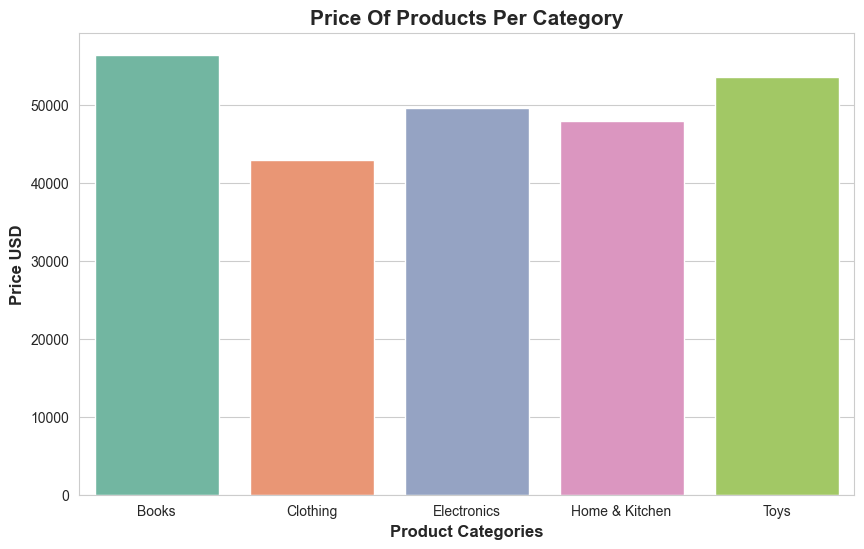

In [ ]:
classifi_categories=df.groupby("Category")["PriceUSD"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_categories,x="Category",y="PriceUSD",hue="Category",palette="Set2")
plt.xlabel("Product Categories",fontsize=12,fontweight="bold")
plt.ylabel("Price USD",fontsize=12,fontweight="bold")
plt.title("Price Of Products Per Category",fontsize=15,fontweight="bold")
plt.show()

### `Total Product Sold Per Category`

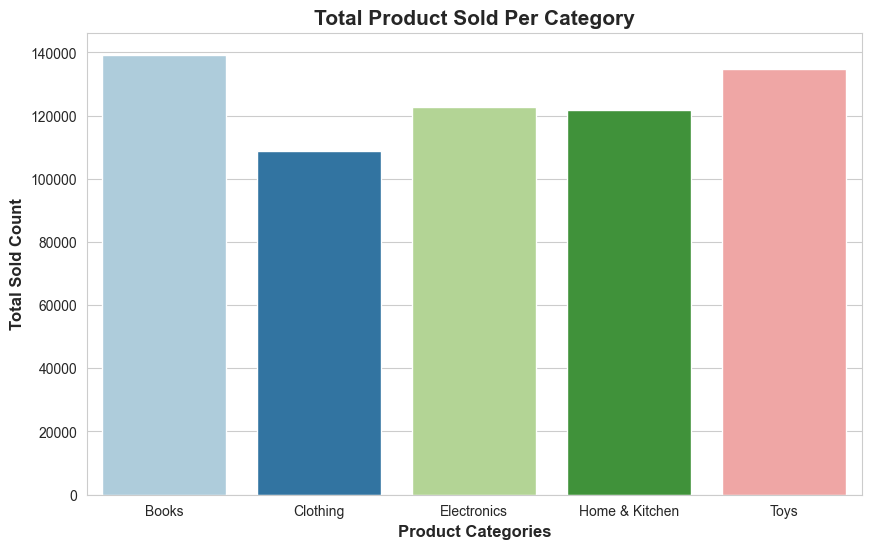

In [ ]:
#Total Sales 
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
Total_sales=df.groupby("Category")["total_sold"].sum().reset_index()
Total_sales
sns.barplot(data=Total_sales,x="Category",y="total_sold",hue="Category",palette="Paired")
plt.xlabel("Product Categories",fontsize=12,fontweight="bold")
plt.ylabel("Total Sold Count",fontsize=12,fontweight="bold")
plt.title("Total Product Sold Per Category",fontsize=15,fontweight="bold")
plt.show()

### `Average Product Review Score By Cetgorywise Classification`

Text(0, 0.5, 'Average Review Score')

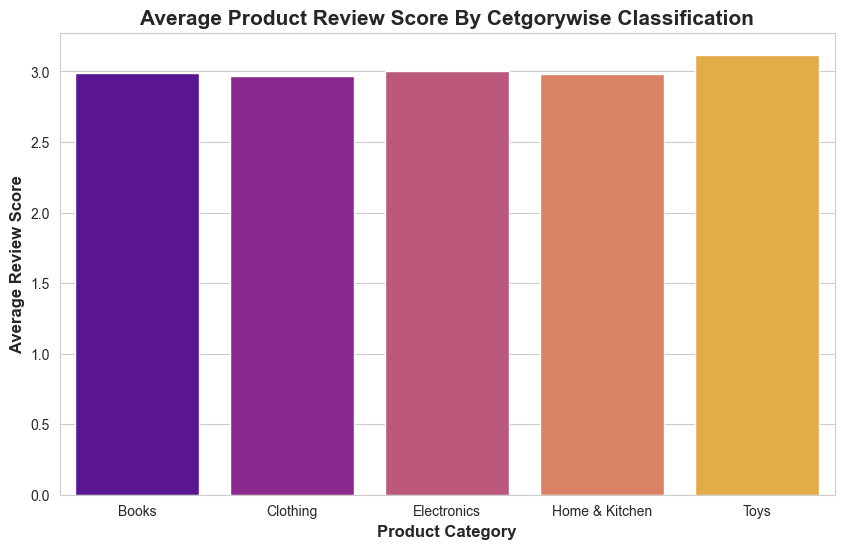

In [ ]:
#Average Product Review Score By Cetgorywise Classification
Re_cl=df.groupby("Category")["ReviewScore"].mean().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=Re_cl,x="Category",y="ReviewScore",hue="Category",palette="plasma")
plt.title("Average Product Review Score By Cetgorywise Classification",fontsize=15,fontweight="bold")
plt.xlabel("Product Category",fontsize=12,fontweight="bold")
plt.ylabel("Average Review Score",fontsize=12,fontweight="bold")

In [ ]:
df["PaymentMethod"].value_counts()

PaymentMethod
Debit Card     256
Gift Card      252
Credit Card    249
PayPal         243
Name: count, dtype: int64

In [ ]:
paym_ca=df.groupby("Category")["PaymentMethod"].value_counts().reset_index()
paym_ca.style.background_gradient(cmap="Reds")

,Category,PaymentMethod,count
0,Books,Debit Card,69
1,Books,Gift Card,58
2,Books,Credit Card,49
3,Books,PayPal,42
4,Clothing,Gift Card,48
5,Clothing,Credit Card,44
6,Clothing,Debit Card,43
7,Clothing,PayPal,41
8,Electronics,PayPal,56
9,Electronics,Gift Card,50


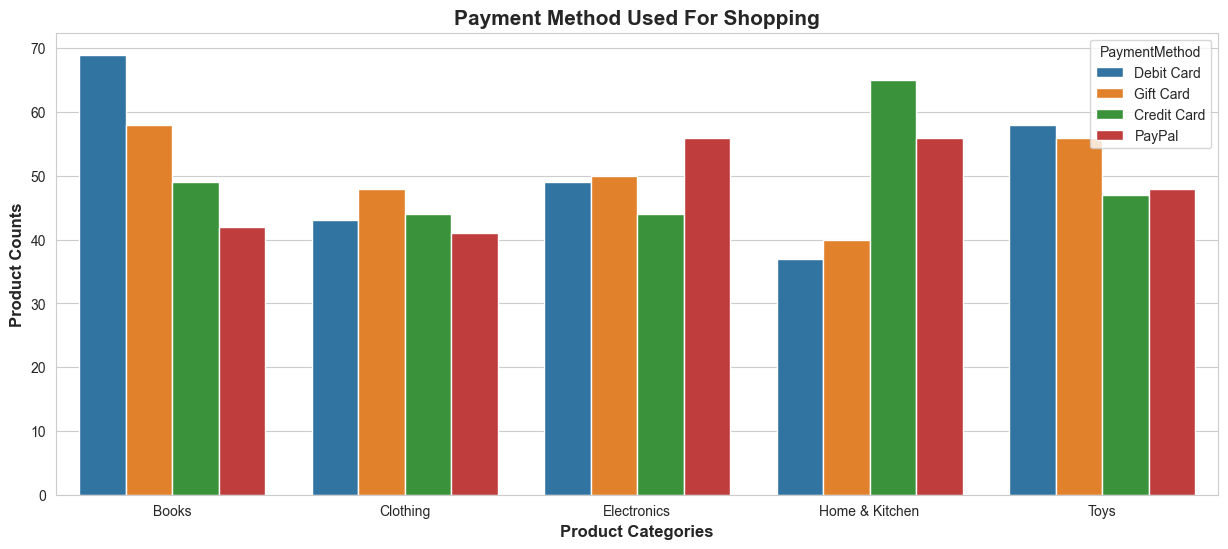

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=paym_ca,x="Category",y="count",hue="PaymentMethod")
plt.title("Payment Method Used For Shopping",fontsize=15,fontweight="bold")
plt.xlabel("Product Categories",fontsize=12,fontweight="bold")
plt.ylabel("Product Counts",fontsize=12,fontweight="bold")
plt.show()

### `Most Recent Last 14 Purchase By product Category`

C:\Users\user\AppData\Local\Temp\ipykernel_9256\2445342928.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pur_datex = df.groupby("Category", group_keys=False).apply(lambda x: x.nlargest(25, "PurchaseDate"))[["Category", "PurchaseDate"]]


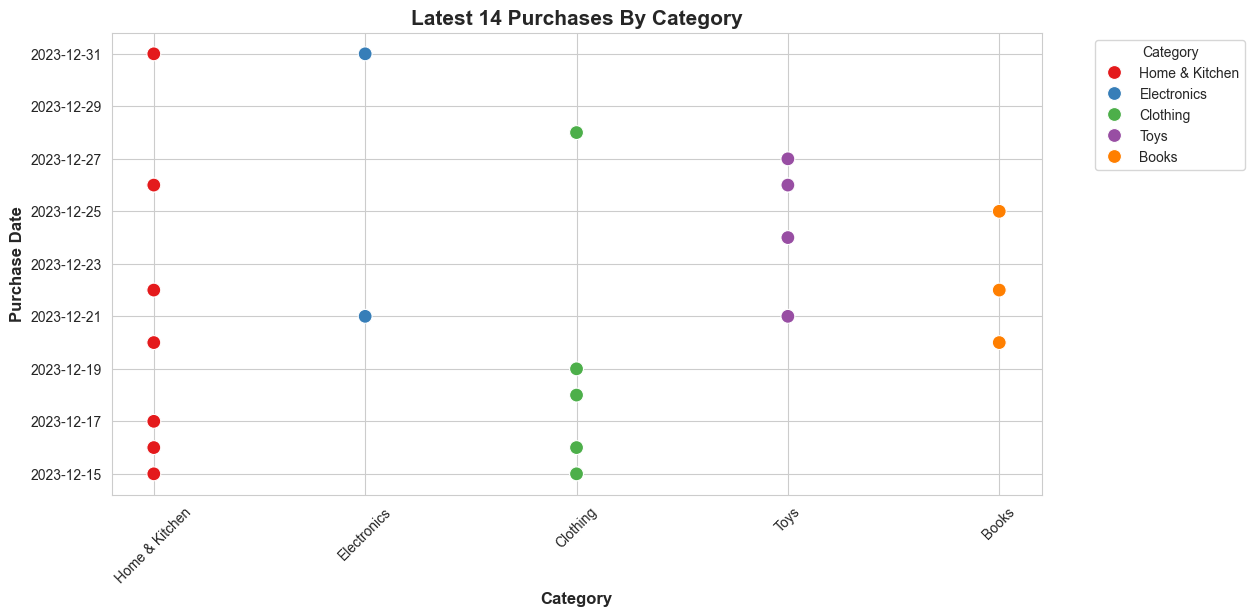

In [ ]:
#Most Recent Last 14 Purchase By product Category
pur_datex = df.groupby("Category", group_keys=False).apply(lambda x: x.nlargest(25, "PurchaseDate"))[["Category", "PurchaseDate"]]
pur_datex = df.nlargest(25, "PurchaseDate")[["Category","PurchaseDate"]]
pur_datex
plt.figure(figsize=(12,6))
sns.scatterplot(data=pur_datex, x="Category", y="PurchaseDate", hue="Category", palette="Set1", s=100)
plt.title("Latest 14 Purchases By Category",fontsize=15, fontweight="bold")
plt.xlabel("Category",fontsize=12, fontweight="bold")
plt.ylabel("Purchase Date",fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
